In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [5]:
import torch
import os
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\HARDIK/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-7-25 Python-3.9.7 torch-1.12.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [7]:
img = 'https://www.twinfm.com/assets/uploaded/images/news/congestion.jpg'

In [8]:
results = model(img)
results.print()

image 1/1: 900x1500 26 cars, 1 traffic light
Speed: 2433.4ms pre-process, 272.1ms inference, 26.0ms NMS per image at shape (1, 3, 384, 640)


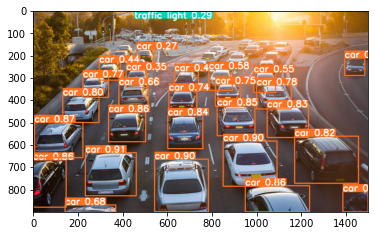

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[189, 172, 156],
         [199, 182, 166],
         [191, 172, 157],
         ...,
         [105,  63,   5],
         [105,  63,   5],
         [105,  62,   7]],
 
        [[190, 169, 148],
         [201, 180, 159],
         [203, 181, 160],
         ...,
         [109,  67,   9],
         [108,  66,   8],
         [107,  65,   7]],
 
        [[147, 122,  91],
         [159, 132, 102],
         [171, 144, 114],
         ...,
         [111,  66,   7],
         [108,  66,   6],
         [106,  64,   6]],
 
        ...,
 
        [[ 23,  12,   8],
         [ 23,  12,   8],
         [ 23,  12,   8],
         ...,
         [255, 112,  31],
         [255, 112,  31],
         [255, 112,  31]],
 
        [[ 23,  12,   8],
         [ 23,  12,   8],
         [ 23,  12,   8],
         ...,
         [255, 112,  31],
         [255, 112,  31],
         [255, 112,  31]],
 
        [[ 24,  13,   9],
         [ 24,  13,   9],
         [ 24,  13,   9],
         ...,
         [255, 112,  31],
  

## real time detection

In [12]:
cap = cv2.VideoCapture('trafic.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Train from scratch

In [3]:
import uuid   # Unique identifier
import os
import time

In [4]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['mask', 'no_mask']
number_imgs = 30

In [16]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

## Training

In [5]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.1-317-g0ab303b Python-3.9.7 torch-1.12.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, 

                 all         42         42    0.00604      0.429    0.00746    0.00154

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
     4/499        0G   0.09987   0.01716   0.06988        30       320:   0%|          | 0/3 [00:05<?, ?it/s]
     4/499        0G   0.09987   0.01716   0.06988        30       320:  33%|###3      | 1/3 [00:05<00:10,  5.33s/it]
     4/499        0G    0.1014   0.01763    0.0691        33       320:  33%|###3      | 1/3 [00:11<00:10,  5.33s/it]
     4/499        0G    0.1014   0.01763    0.0691        33       320:  67%|######6   | 2/3 [00:11<00:05,  5.57s/it]
     4/499        0G    0.1007    0.0178   0.06742        21       320:  67%|######6   | 2/3 [00:15<00:05,  5.57s/it]
     4/499        0G    0.1007    0.0178   0.06742        21       320: 100%|##########| 3/3 [00:15<00:00,  4.86s/it]
     4/499        0G    0.1007    0.0178   0.06742        21       320: 100%|##########| 3/3 [00:15<00

  0%|          | 0/3 [00:00<?, ?it/s]
    55/499        0G   0.07091   0.01155  0.005802        30       320:   0%|          | 0/3 [00:06<?, ?it/s]
    55/499        0G   0.07091   0.01155  0.005802        30       320:  33%|###3      | 1/3 [00:06<00:12,  6.32s/it]
    55/499        0G   0.07031    0.0119  0.007896        29       320:  33%|###3      | 1/3 [00:12<00:12,  6.32s/it]
    55/499        0G   0.07031    0.0119  0.007896        29       320:  67%|######6   | 2/3 [00:12<00:05,  5.95s/it]
    55/499        0G   0.07117   0.01248  0.008484        23       320:  67%|######6   | 2/3 [00:15<00:05,  5.95s/it]
    55/499        0G   0.07117   0.01248  0.008484        23       320: 100%|##########| 3/3 [00:15<00:00,  4.93s/it]
    55/499        0G   0.07117   0.01248  0.008484        23       320: 100%|##########| 3/3 [00:15<00:00,  5.24s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Cl


     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   114/499        0G    0.0482  0.009685  0.004652        32       320:   0%|          | 0/3 [00:09<?, ?it/s]
   114/499        0G    0.0482  0.009685  0.004652        32       320:  33%|###3      | 1/3 [00:09<00:18,  9.20s/it]
   114/499        0G   0.04809  0.008231  0.004263        21       320:  33%|###3      | 1/3 [00:18<00:18,  9.20s/it]
   114/499        0G   0.04809  0.008231  0.004263        21       320:  67%|######6   | 2/3 [00:18<00:09,  9.43s/it]
   114/499        0G   0.04698  0.008172  0.004279        15       320:  67%|######6   | 2/3 [00:24<00:09,  9.43s/it]
   114/499        0G   0.04698  0.008172  0.004279        15       320: 100%|##########| 3/3 [00:24<00:00,  7.79s/it]
   114/499        0G   0.04698  0.008172  0.004279        15       320: 100%|##########| 3/3 [00:24<00:00,  8.21s/it]

               Class     Images     Labels          P          R     m

   129/499        0G   0.04403  0.009841  0.004649        37       320:  33%|###3      | 1/3 [00:18<00:17,  8.94s/it]
   129/499        0G   0.04403  0.009841  0.004649        37       320:  67%|######6   | 2/3 [00:18<00:09,  9.22s/it]
   129/499        0G   0.04295  0.009141  0.004823        17       320:  67%|######6   | 2/3 [00:24<00:09,  9.22s/it]
   129/499        0G   0.04295  0.009141  0.004823        17       320: 100%|##########| 3/3 [00:24<00:00,  7.81s/it]
   129/499        0G   0.04295  0.009141  0.004823        17       320: 100%|##########| 3/3 [00:24<00:00,  8.16s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:06<00:06,  6.22s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:08<00:00,  3.71s/it]
               


  0%|          | 0/3 [00:00<?, ?it/s]
   260/499        0G   0.03423  0.006521  0.002893        30       320:   0%|          | 0/3 [00:08<?, ?it/s]
   260/499        0G   0.03423  0.006521  0.002893        30       320:  33%|###3      | 1/3 [00:08<00:16,  8.27s/it]
   260/499        0G   0.03274  0.007313  0.003005        34       320:  33%|###3      | 1/3 [00:17<00:16,  8.27s/it]
   260/499        0G   0.03274  0.007313  0.003005        34       320:  67%|######6   | 2/3 [00:17<00:09,  9.05s/it]
   260/499        0G   0.03345  0.006911   0.00315        14       320:  67%|######6   | 2/3 [00:23<00:09,  9.05s/it]
   260/499        0G   0.03345  0.006911   0.00315        14       320: 100%|##########| 3/3 [00:23<00:00,  7.61s/it]
   260/499        0G   0.03345  0.006911   0.00315        14       320: 100%|##########| 3/3 [00:23<00:00,  7.92s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               C

   290/499        0G   0.02339  0.007681  0.003063        38       320:  33%|###3      | 1/3 [00:12<00:12,  6.27s/it]
   290/499        0G   0.02339  0.007681  0.003063        38       320:  67%|######6   | 2/3 [00:12<00:06,  6.19s/it]
   290/499        0G   0.02389  0.008426  0.003121        26       320:  67%|######6   | 2/3 [00:15<00:06,  6.19s/it]
   290/499        0G   0.02389  0.008426  0.003121        26       320: 100%|##########| 3/3 [00:15<00:00,  4.78s/it]
   290/499        0G   0.02389  0.008426  0.003121        26       320: 100%|##########| 3/3 [00:15<00:00,  5.17s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:03<00:03,  3.05s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:03<00:00,  1.81s/it]
               

   376/499        0G   0.02172  0.005564  0.002163        16       320: 100%|##########| 3/3 [00:15<00:00,  5.07s/it]
   376/499        0G   0.02172  0.005564  0.002163        16       320: 100%|##########| 3/3 [00:15<00:00,  5.22s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:03<00:03,  3.05s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  1.83s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  2.02s/it]
                 all         42         42      0.995          1      0.995      0.785

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   377/499        0G   0.02292   0.00

   456/499        0G   0.01549  0.006138  0.001798        23       320: 100%|##########| 3/3 [00:15<00:00,  4.92s/it]
   456/499        0G   0.01549  0.006138  0.001798        23       320: 100%|##########| 3/3 [00:15<00:00,  5.22s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:03<00:03,  3.08s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  1.85s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  2.04s/it]
                 all         42         42      0.997          1      0.995       0.89

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   457/499        0G   0.01524  0.005

## Load the model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\HARDIK/.cache\torch\hub\master.zip
YOLOv5  2022-7-26 Python-3.9.7 torch-1.12.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [6]:
img = os.path.join('data', 'images', 'mask.6838b1d0-0bd9-11ed-927d-d7d471396d28.jpg')

In [7]:
results = model(img)

In [8]:
results.print()

image 1/1: 480x640 1 mask
Speed: 138.4ms pre-process, 729.6ms inference, 15.6ms NMS per image at shape (1, 3, 480, 640)


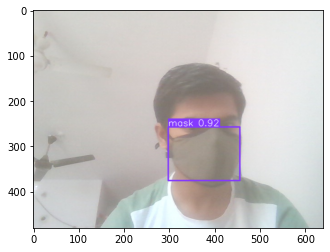

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()